# I will be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

### I will be trying to answer questions below by exploratory data analysis. Questions are;
- Do men or women speed more often?
- Does gender affect who gets searched during a stop?
- During a search, how often is the driver frisked?
- Which year had the least number of stops?
- How does drug activity change by time of day?
- Do most stops occur at night?

First, it is important to get familiarize with the dataset. Let's start analyzing data by importing essential libraries.

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("police.csv")

/Users/emresengul/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(509681, 26)

In [4]:
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [5]:
df.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

***

There are so many missing values. Also some columns does not usefull to my analysis. I will drop ``county_name`` , ``county_fips``, ``fine_grained_location`` because they only contains missing values. I will also drop ``state`` column because all traffic stops took place in one state which is Rhode Island. Let's drop those columns.

***

In [6]:
df = df.drop(columns=["county_name", "state", "fine_grained_location", "county_fips"])

In [7]:
df.shape

(509681, 22)

***

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this analysis, the ``driver_gender`` column will be critical to many of my analyses. Because only a small fraction of rows are missing ``driver_gender``, I'll drop those rows from the dataset.

***

In [8]:
df = df.dropna(axis=0, subset=["driver_gender"])
df.isnull().sum()

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

In [9]:
df.shape

(480584, 22)

***

## Fixing a data type

We know that the ``is_arrested`` column currently has the ``object`` data type. In this analysis, I'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

***

In [10]:
df["is_arrested"] = df["is_arrested"].astype("bool")
df["is_arrested"]

0         False
1         False
3         False
4         False
5         False
          ...  
509666    False
509667    False
509668    False
509669    False
509670    False
Name: is_arrested, Length: 480584, dtype: bool

***

## Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: ``stop_date`` and ``stop_time``.

I'll combine these two columns into a single column, and then convert it to ``datetime`` format. This will enable convenient date-based attributes that I'll use later in the course.

***

In [11]:
df["stop_datetime"] = pd.to_datetime(df["stop_date"] + " " + df["stop_time"])
df["stop_datetime"]

0        2005-01-02 01:55:00
1        2005-01-02 20:30:00
3        2005-01-04 12:55:00
4        2005-01-06 01:30:00
5        2005-01-12 08:05:00
                 ...        
509666   2015-12-31 22:46:00
509667   2015-12-31 22:47:00
509668   2015-12-31 23:08:00
509669   2015-12-31 23:44:00
509670   2015-12-31 23:48:00
Name: stop_datetime, Length: 480584, dtype: datetime64[ns]

***

Now let's set ``stop_datetime`` column as the DataFrame's index.

***

In [12]:
df = df.set_index("stop_datetime")
df.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

***

We are ready to start finding answers to our questions.


Let's start with gender. Does the gender of a driver have an impact on police behavior during a traffic stop? We will explore that question while practicing **filtering, grouping, method chaining, Boolean math, string methods, and more!**

## Examining traffic violations

Let's count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.

***

In [13]:
df["violation"].value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

***

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

I'll first create a DataFrame for each gender, and then analyze the ``violations`` in each DataFrame separately.

***

In [14]:
female_drivers = df[df["driver_gender"] == "F"]
male_drivers = df[df["driver_gender"] == "M"]

In [15]:
female_drivers["violation"].value_counts(normalize=True) * 100

Speeding               65.730757
Moving violation       13.658131
Equipment              10.705516
Registration/plates     4.307676
Other                   2.890848
Seat belt               2.707072
Name: violation, dtype: float64

In [16]:
male_drivers["violation"].value_counts(normalize=True) * 100

Speeding               52.236397
Moving violation       20.694757
Equipment              13.510242
Other                   5.844966
Registration/plates     4.058138
Seat belt               3.655500
Name: violation, dtype: float64

***

Female drivers tend to commit speeding %13 more than male drivers. But what about outcomes? Let's work on comparing speeding outcomes by gender.


## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

First, let's create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, I'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

***

In [17]:
female_speeding = female_drivers[female_drivers["violation"] == "Speeding"]
male_speeding = male_drivers[male_drivers["violation"] == "Speeding"]

In [18]:
female_speeding["stop_outcome"].value_counts(normalize=True) * 100

Citation            95.324718
Warning              3.900323
Arrest Driver        0.529015
Arrest Passenger     0.103251
N/D                  0.090489
No Action            0.052205
Name: stop_outcome, dtype: float64

In [19]:
male_speeding["stop_outcome"].value_counts(normalize=True) * 100

Citation            94.463619
Warning              3.608564
Arrest Driver        1.576658
Arrest Passenger     0.126549
N/D                  0.118332
No Action            0.106279
Name: stop_outcome, dtype: float64

***

Although Citation and Warning is fairly close to each other, Arrest Driver is almost three times more for male drivers. Given our sample size, this may lead to conclusion about outcomes of speeding by gender. Now, let's dive into search rate.

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Let's calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.


Firstly I'll change the data type of `search_conducted` column to Boolean Series.

***

In [20]:
df["search_conducted"] = df["search_conducted"].astype("bool")

In [21]:
round(df["search_conducted"].value_counts(normalize=True) * 100, 3)

False    96.304
True      3.696
Name: search_conducted, dtype: float64

***

Most of the stops does not end up to a search conducted. But is this the case for both male and female drivers? Let's compare search rates by gender to answer this question.

## Comparing search rates by gender

I will compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, I'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, I'll perform the same calculation for both genders at once using a ``.groupby()``.

***

In [22]:
round(female_drivers["search_conducted"].value_counts(normalize=True) * 100, 3)

False    98.125
True      1.875
Name: search_conducted, dtype: float64

***

%1,875 of the speeding stops ends up to a search for female drivers. What is the case for male drivers?

***

In [23]:
round(male_drivers["search_conducted"].value_counts(normalize=True) * 100, 3)

False    95.621
True      4.379
Name: search_conducted, dtype: float64

In [24]:
round(df.groupby("driver_gender")["search_conducted"].mean() * 100, 3)

driver_gender
F    1.875
M    4.379
Name: search_conducted, dtype: float64

***

%1,875 of the speeding stops ends up to a search for male drivers. That is more than two times compared to female drivers. Is this mean male drivers getting searched more just because of their gender? Or is there another reason? Let's add a second factor to the analysis.

***

## Adding a second factor to the analysis


Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation. Let's find out below if that's the case!

***

In [25]:
df.groupby(["driver_gender", "violation"])["search_conducted"].mean()

driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64

In [26]:
df.groupby(["violation", "driver_gender"])["search_conducted"].mean()

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

***

As we can see better by those results, whatever the reason for the stop, police tend to conduct a search to male drivers so much more than female drivers. That is our first conclusion so far in this explanatory data analysis. Now let's jump into another analysis about ``search_conducted`` column.

## Counting protective frisks


During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

I'll first check to see how many times "Protective Frisk" was the only search type. Then, I'll use a string method to locate all instances in which the driver was frisked.

***

In [27]:
print(f'{len(df[df["search_type"] == "Protective Frisk"])} times ``Protective Frisk`` was the only search type.')

879 times ``Protective Frisk`` was the only search type.


In [28]:
df["frisk"] = df["search_type"].str.contains("Protective Frisk", na=False, case=False)
round(df["frisk"].value_counts(normalize=True) * 100, 3)

False    99.667
True      0.333
Name: frisk, dtype: float64

***

In 300 searches only 1 search included ``Protective Frisk`` as only or one of search type. What about frisk rates by gender?

## Comparing frisk rates by gender


I'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

***

In [29]:
search_true =df[df["search_conducted"] == True]
round(search_true.groupby("driver_gender")["frisk"].mean() * 100, 3)

driver_gender
F    6.669
M    9.371
Name: frisk, dtype: float64

Again male drivers getting more searches for frisk. We proved that gender has an huge impact. 


Now let's calculate hourly arrest rate. Does the hour of the day has an impact on arrest rate? Let's find out!

## Calculating the hourly arrest rate

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this part of our analysis, we will answer these and other questions by analyzing the dataset visually, since plots can help us to understand trends in a way that examining the raw data cannot.

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. Let's find out whether the arrest rate varies by time of day.

First, I'll calculate the arrest rate across all stops. Then, I'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``


***

In [30]:
df["hour"] = df["stop_time"].str.split(":", expand=True)[0]
df["hour"]

stop_datetime
2005-01-02 01:55:00    01
2005-01-02 20:30:00    20
2005-01-04 12:55:00    12
2005-01-06 01:30:00    01
2005-01-12 08:05:00    08
                       ..
2015-12-31 22:46:00    22
2015-12-31 22:47:00    22
2015-12-31 23:08:00    23
2015-12-31 23:44:00    23
2015-12-31 23:48:00    23
Name: hour, Length: 480584, dtype: object

In [31]:
hourly_arrest_rate = df.groupby("hour")["is_arrested"].mean()

***

## Plotting the hourly arrest rate

I'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because it will be showing how a quantity changes over time.

This plot should help us to spot some trends that may not have been obvious when examining the raw numbers!

***

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

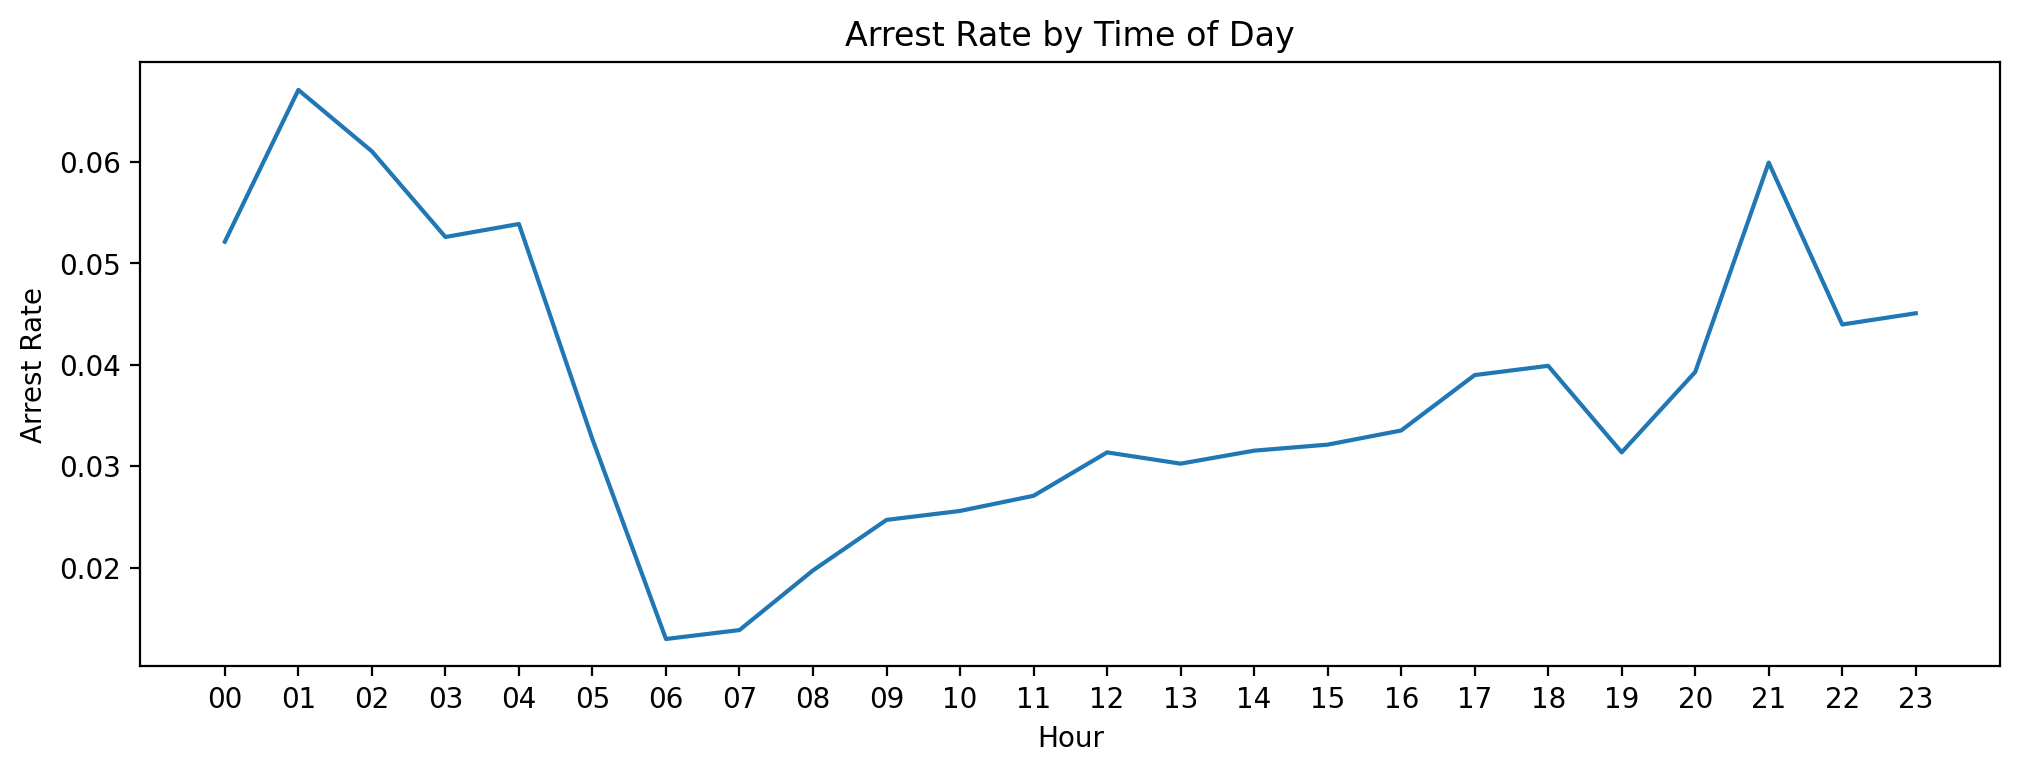

In [32]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x=hourly_arrest_rate.index, y=hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

***

We can clearly see that in midnight it is more likely to get arrested. What about drug-realted stops?

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. I'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. I'll calculate the **annual drug rate** by **resampling** this column, and then I'll use a line plot to visualize how the rate has changed over time.

***

In [33]:
round(df["drugs_related_stop"].value_counts(normalize=True) * 100, 3)

False    99.008
True      0.992
Name: drugs_related_stop, dtype: float64

In [34]:
df["year"] = df["stop_date"].str.split("-", expand=True)[0]
annual_drug_rate = df.groupby("year")["drugs_related_stop"].sum()

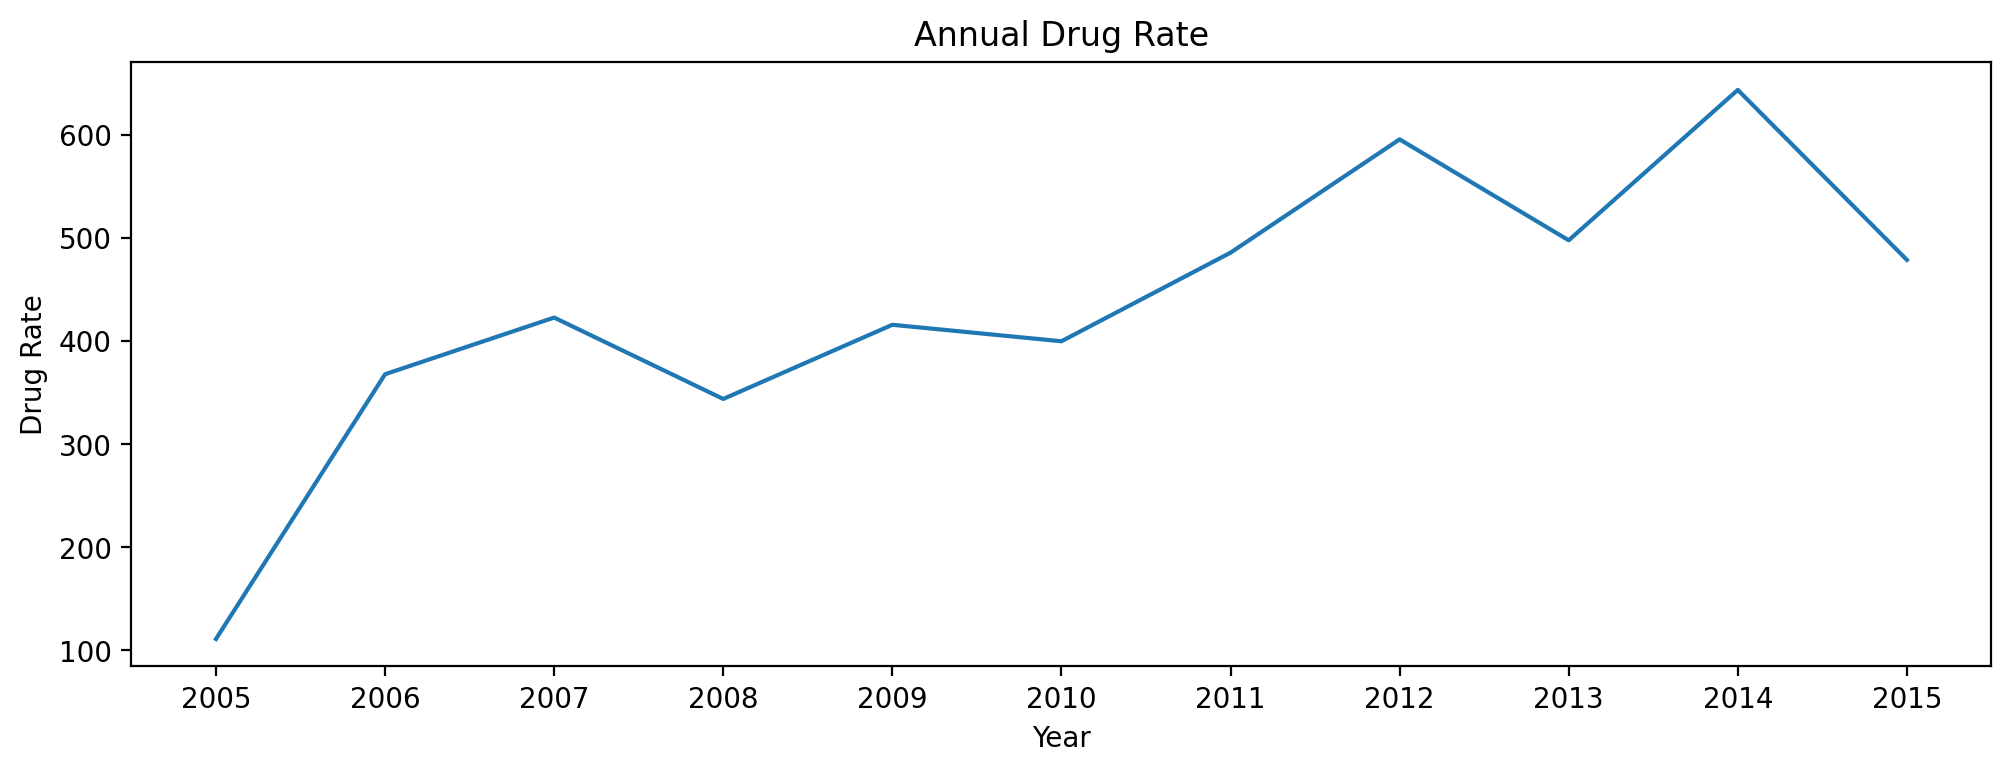

In [35]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x=annual_drug_rate.index, y=annual_drug_rate)
plt.xlabel("Year")
plt.ylabel("Drug Rate")
plt.title("Annual Drug Rate");

***

It is clear that annual drug rate increased over time dramatically. Is this because also the rate of vehicle searches also increasing? Let's find out!

***

In [36]:
annual_search_rate = df.groupby("year")["search_conducted"].sum()
annual = pd.concat([annual_search_rate, annual_drug_rate], axis=1)
annual

,search_conducted,drugs_related_stop
year,,
2005,700,111
2006,2097,368
2007,2098,423
2008,1802,344
2009,1985,416
2010,1660,400
2011,1610,486
2012,1860,596
2013,1218,498


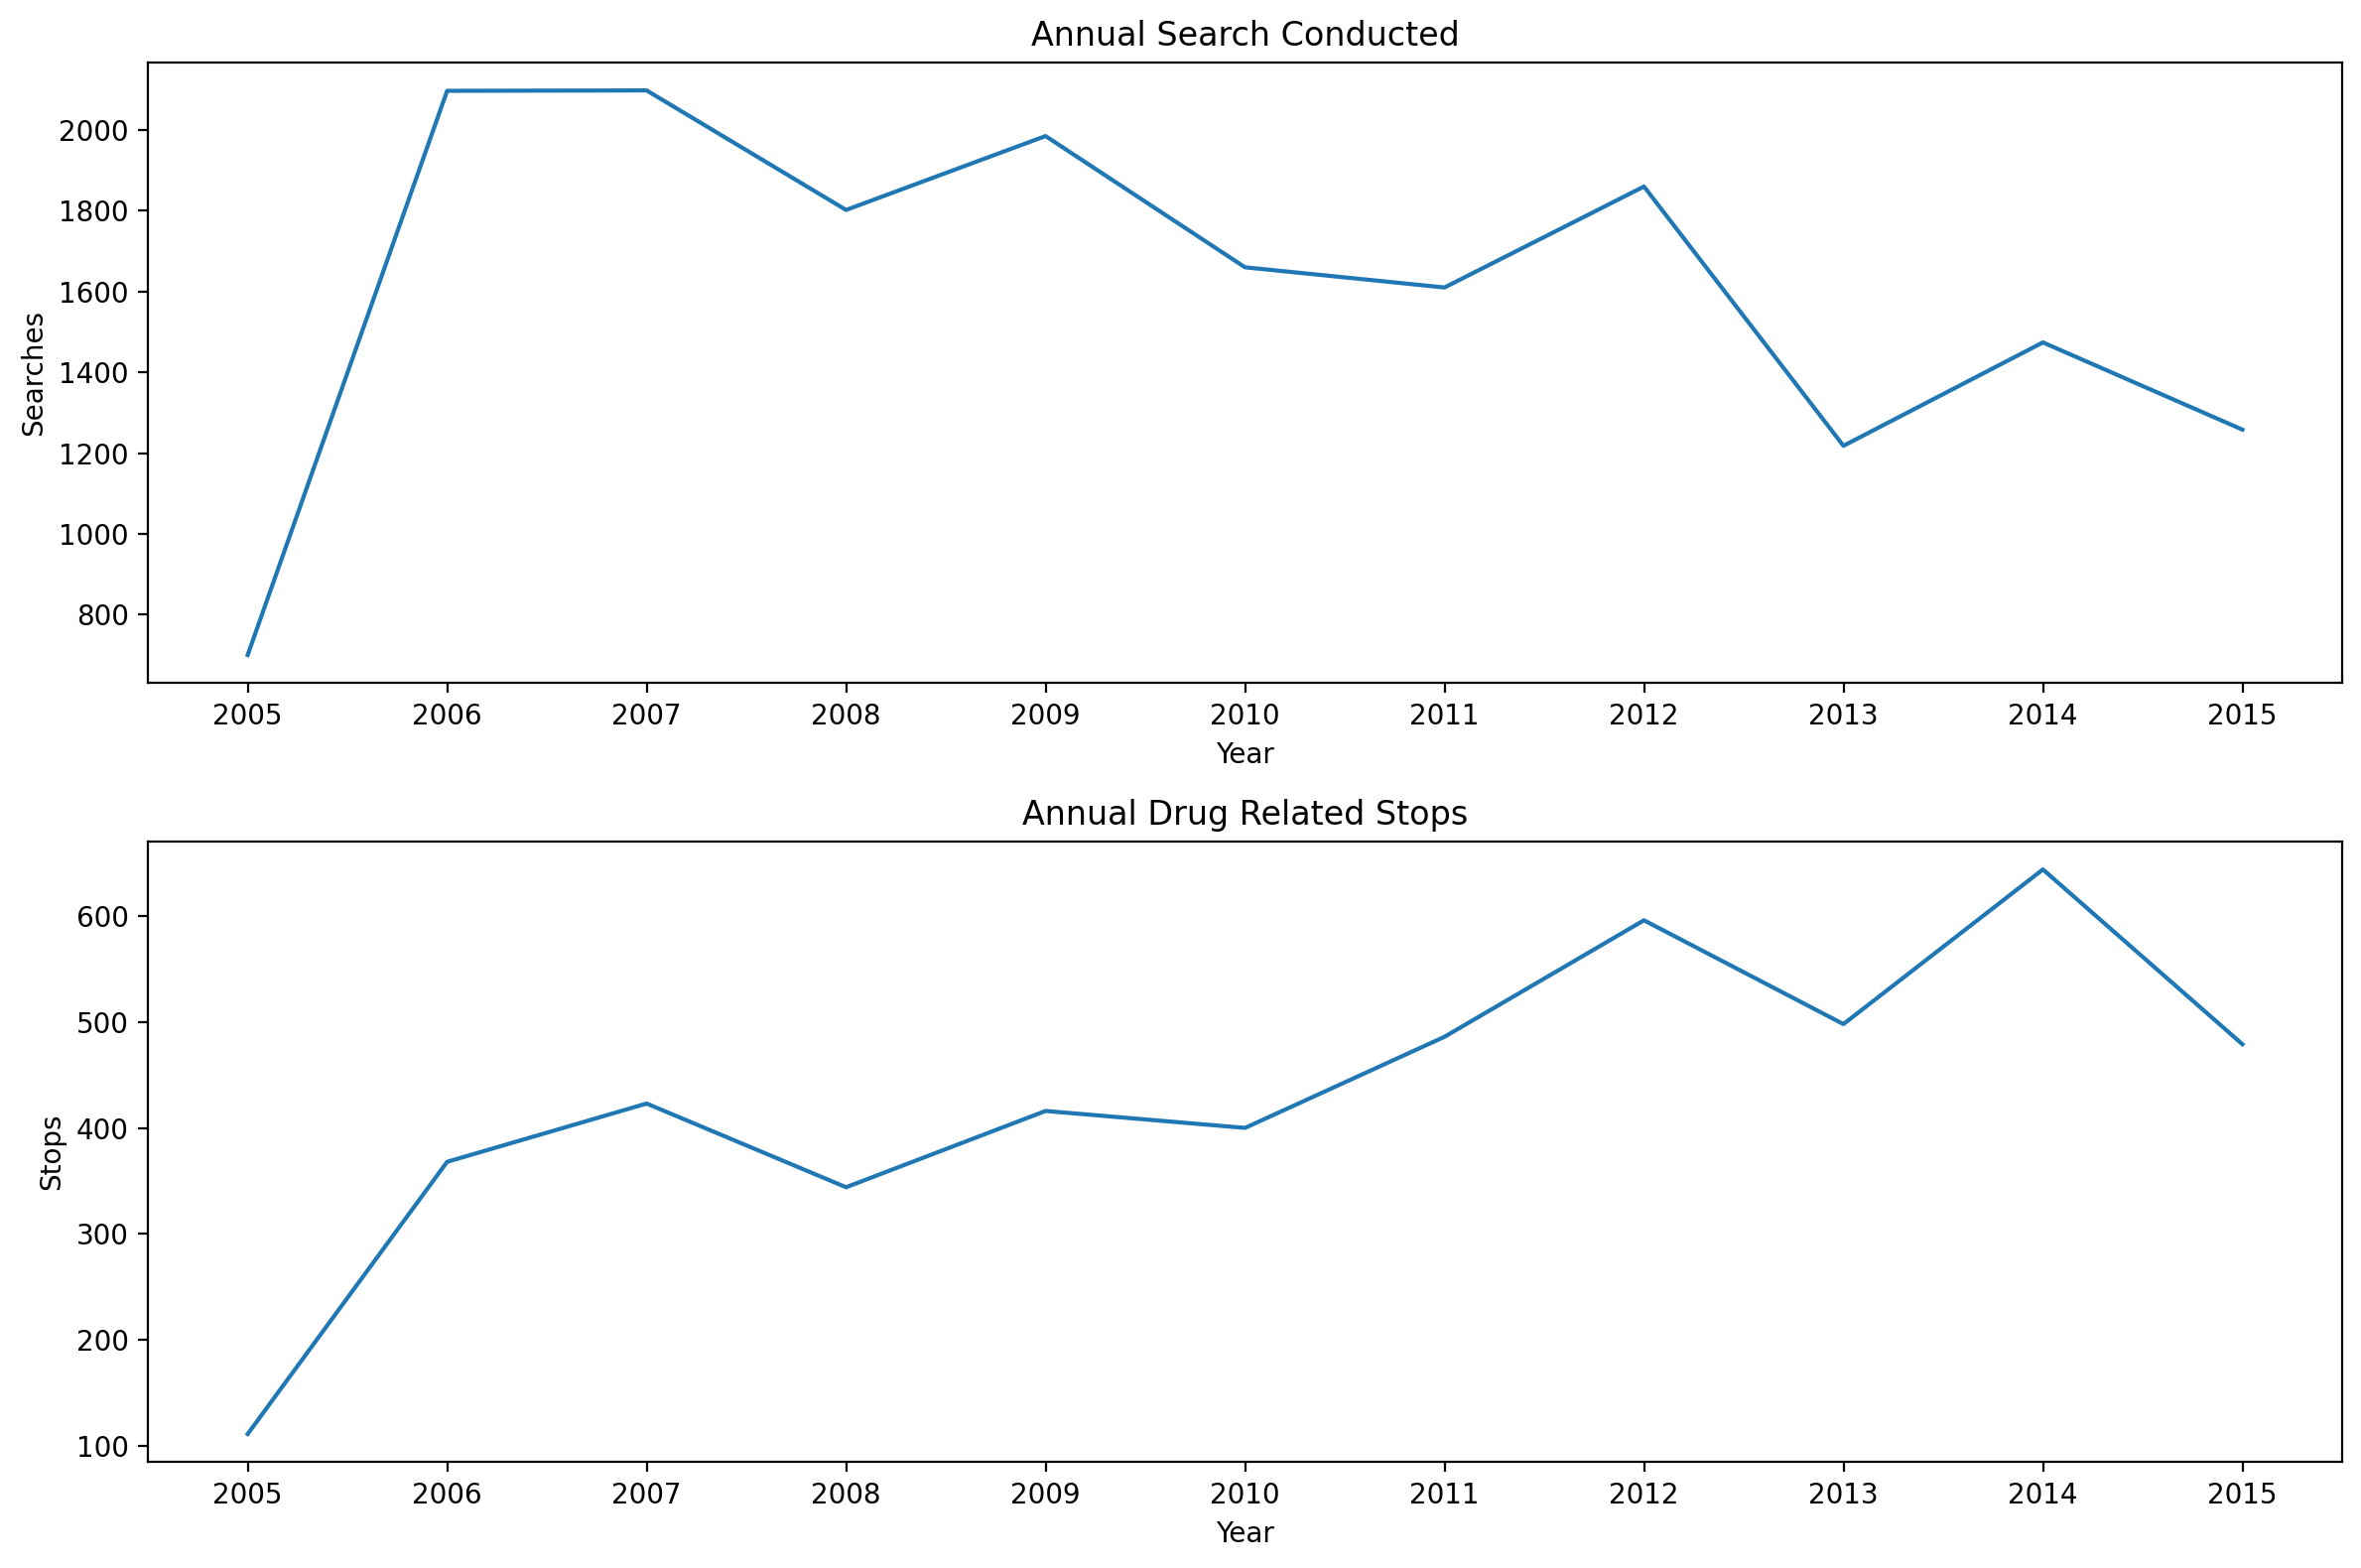

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8), dpi=200)
axes[0].plot(annual.index, annual["search_conducted"])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Searches")
axes[0].set_title("Annual Search Conducted")


axes[1].plot(annual.index, annual["drugs_related_stop"])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Stops")
axes[1].set_title("Annual Drug Related Stops")

fig.tight_layout()

***

Our hypotesis about the reasons of increase in the annual drug related stops is wrong. Although annual search conducted rate decreased, annual drug related stops increased dramatically. What about police zones? 

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this part of our analysis, I'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, I'll filter the table to focus on the ``"K"`` zones, which I'll examine further in the next part of analysis.

***

In [38]:
all_zones = pd.crosstab(df["district"],df["violation"])
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [39]:
k_zones = all_zones.loc["Zone K1": "Zone K3"]
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

In this part of the analysis, I will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. I will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

I'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First I'll print the summary statistics, and then you'll visualize the data using a **box plot**.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees **Fahrenheit**, not Celsius!

***

In [40]:
weather = pd.read_csv("weather.csv")
weather.loc[:,["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [41]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

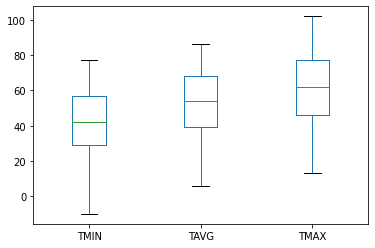

In [42]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")

***

## Plotting the temperatur difference

Now I'll continue to assess ``whether`` the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

***

In [43]:
weather["TDIFF"] =weather["TMIN"] - weather["TMAX"]
round(weather["TDIFF"].describe(), 3)

count    7994.000
mean      -19.149
std         7.010
min       -48.000
25%       -24.000
50%       -19.000
75%       -14.000
max        25.000
Name: TDIFF, dtype: float64

<AxesSubplot:xlabel='TDIFF', ylabel='Count'>

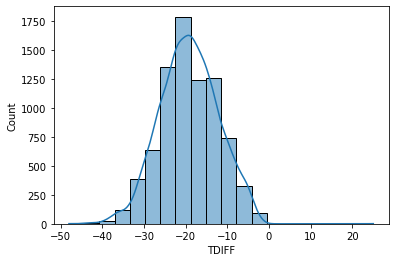

In [44]:
sns.histplot(x="TDIFF", data=weather, bins=20, kde=True)

***

The histogram about the difference between the maximum and minimum temperatures shows normal distribution.

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

I'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

***

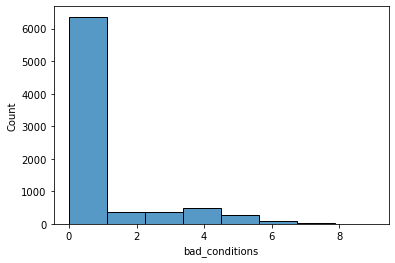

In [45]:
WT = weather.loc[:,"WT01":"WT22"]
WT["bad_conditions"] = WT.apply(np.sum, axis=1)
WT["bad_conditions"] = WT["bad_conditions"].fillna(0)
sns.histplot(x="bad_conditions", data=WT, bins=8);

***

## Rating the weather conditions

I counted the number of bad weather conditions each day. Now, I'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

***

In [46]:
WT["bad_conditions"].value_counts(dropna = False).sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [47]:
mapping = {
    0: "good",
    1: "bad",
    2: "bad",
    3: "bad",
    4: "bad",
    5: "worse",
    6: "worse",
    7: "worse",
    8: "worse",
    9: "worse"
}

WT["rating"] = WT["bad_conditions"].replace(mapping)
WT["rating"].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

All done. Let's keep going.

## Changing the data type to category

Since the ``rating`` column only has a few possible values, I'll change its data type to ``category`` in order to store the data more efficiently. I'll also specify a logical order for the categories, which will be useful for future exercises.

***

In [48]:
cats = ["good", "bad", "worse"]
WT["rating"] = pd.Categorical(WT["rating"], ordered = True, categories = cats)
WT["rating"]

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [49]:
weather["rating"] = WT["rating"]
weather["bad_conditions"] = WT["bad_conditions"]
weather_rating = weather[["DATE", "rating"]]

***

## Preparing the DataFrames

It is time to prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``df`` ``DataFrame``, I'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, I'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

***

In [50]:
df = df.reset_index()

In [51]:
combined = df.stop_date.str.cat(df.stop_time, sep=' ')
df['stop_datetime'] = pd.to_datetime(combined)

In [52]:
df['stop_datetime']

0        2005-01-02 01:55:00
1        2005-01-02 20:30:00
2        2005-01-04 12:55:00
3        2005-01-06 01:30:00
4        2005-01-12 08:05:00
                 ...        
480579   2015-12-31 22:46:00
480580   2015-12-31 22:47:00
480581   2015-12-31 23:08:00
480582   2015-12-31 23:44:00
480583   2015-12-31 23:48:00
Name: stop_datetime, Length: 480584, dtype: datetime64[ns]

In [53]:
weather_rating.DATE

0       2005-01-01
1       2005-01-02
2       2005-01-03
3       2005-01-04
4       2005-01-05
           ...    
8017    2015-12-27
8018    2015-12-28
8019    2015-12-29
8020    2015-12-30
8021    2015-12-31
Name: DATE, Length: 8022, dtype: object

***

## Merging the DataFrames

Now I'll ``merge`` the ``df`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``df`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, I'll set ``stop_datetime`` as the index, which is the column I saved in the previous exercise.

***

In [54]:
ri_weather = pd.merge(left=df, right=weather_rating, how="left", left_on=df.stop_date, right_on=weather_rating.DATE)
ri_weather.drop(columns="key_0", inplace=True)
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,hour,year,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,01,2005,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,01,2005,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,20,2005,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,20,2005,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,12,2005,2005-01-04,good


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Let's find out below!

- **First**, I'll calculate the **overall arrest rate**.

- **Then**, I'll calculate the **arrest rate** for each of the **weather ratings** I previously assigned.

- **Finally**, I'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since I previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

***

In [55]:
round(ri_weather["is_arrested"].mean(), 3)

0.035

In [56]:
arrest_rate = ri_weather.groupby(["rating", "violation"])["is_arrested", "violation"].mean()

<ipython-input-56-f6518429be02>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arrest_rate = ri_weather.groupby(["rating", "violation"])["is_arrested", "violation"].mean()


***

## Selecting from a multi-indexed series


The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
Now we will practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

***

In [57]:
round(arrest_rate.loc["bad", "Moving violation"], 4)

is_arrested    0.0581
Name: (bad, Moving violation), dtype: float64

In [58]:
round(arrest_rate.loc["good","Speeding"], 4)

is_arrested    0.0135
Name: (good, Speeding), dtype: float64

In [59]:
round(arrest_rate.loc["bad","Speeding"], 4)

is_arrested    0.0133
Name: (bad, Speeding), dtype: float64

In [60]:
round(arrest_rate.loc["worse","Speeding"], 4)

is_arrested    0.0166
Name: (worse, Speeding), dtype: float64

***

## Reshaping the arrest rate data

In this last part of my analysis, I'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, I'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

***

In [61]:
arrest_rate.unstack()

is_arrested                                                 \
violation   Equipment Moving violation     Other Registration/plates   
rating                                                                 
good         0.059125         0.056805  0.080682            0.083238   
bad          0.059581         0.058081  0.084950            0.092634   
worse        0.094373         0.062249  0.058704            0.098673   

                               
violation Seat belt  Speeding  
rating                         
good       0.026339  0.013494  
bad        0.028795  0.013348  
worse      0.000000  0.016600

In [62]:
ri_weather.pivot_table(index="violation", columns="rating", values="is_arrested").T

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.059125,0.056805,0.080682,0.083238,0.026339,0.013494
bad,0.059581,0.058081,0.084950,0.092634,0.028795,0.013348
worse,0.094373,0.062249,0.058704,0.098673,0.000000,0.016600


***

This is the end of my analysis. We end up making conclusions about various topics. It was a great experince for me. I hope you enjoyed it too.


# THE END.